In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
import os, gc

import requests, urllib
from bs4 import BeautifulSoup

# Crawl data
[觀測資料查詢系統](https://e-service.cwb.gov.tw/HistoryDataQuery/index.jsp)
## 用BeautifulSoup解析html爬取資料

In [38]:
url = 'https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-08-08'
response = requests.get(url)

In [39]:
soup = BeautifulSoup(response.text)

In [40]:
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<link href="css/tablecss.css" rel="stylesheet" type="text/css"/>
<script src="js/jquery-3.3.1.js"></script>
<script src="js/Blob.js"></script>
<script src="js/FileSaver.js"></script>
<script src="js/tableexport.js"></script>
<script type="text/javascript">
	var url = "DayDataController.do?command=viewMain";

	$(function() {
		var preArr = "2020-08-07".split("-");
		var nexArr = "2020-08-09".split("-");
		var now = new Date();
		var exportName = "466920-2020-08-08";

		if (new Date(preArr[0], preArr[1] - 1, preArr[2]) < new Date(2005, 0, 1))
			$("#preItem").css("display", "none");
		if (new Date(nexArr[0], nexArr[1] - 1, nexArr[2]) >= new Date(now
				.getFullYear(), now.getMonth(), now.getDate()))
			$("#nexItem").css("display", "none");

		$("#preItem").click(
				function(event) {
					window.location.href = encodeURI(url
							+ "&station=466920&stname="
							+ en

In [41]:
soup.select('table#MyTable tr.second_tr')[0].select('th')

[<th>觀測時間<br/>(hour)</th>,
 <th>測站氣壓<br/>(hPa)</th>,
 <th>海平面氣壓<br/>(hPa)</th>,
 <th>氣溫<br/>(℃)</th>,
 <th>露點溫度<br/>(℃)</th>,
 <th>相對溼度<br/>(%)</th>,
 <th>風速<br/>(m/s)</th>,
 <th>風向<br/>(360degree)</th>,
 <th>最大陣風<br/>(m/s)</th>,
 <th>最大陣風風向<br/>(360degree)</th>,
 <th>降水量<br/>(mm)	</th>,
 <th>降水時數<br/>(hr)</th>,
 <th>日照時數<br/>(hr)</th>,
 <th>全天空日射量<br/>(MJ/㎡)</th>,
 <th>能見度<br/>(km)	</th>,
 <th>紫外線指數</th>,
 <th>總雲量<br/>(0~10)</th>]

In [42]:
t_name = soup.select('table#MyTable tr.second_tr')[0].select('th')
for i, td in enumerate(soup.select('table#MyTable')[0].select('tr')[3].select('td')):
    print(f"{t_name[i].text} : {td.text}")

觀測時間(hour) : 01
測站氣壓(hPa) : 1003.5 
海平面氣壓(hPa) : 1006.9 
氣溫(℃) : 29.5 
露點溫度(℃) : 24.4 
相對溼度(%) : 74 
風速(m/s) : 1.2 
風向(360degree) : 230 
最大陣風(m/s) : 3.5 
最大陣風風向(360degree) : 170 
降水量(mm)	 : 0.0 
降水時數(hr) : 0.0 
日照時數(hr) : ... 
全天空日射量(MJ/㎡) : 0.00 
能見度(km)	 : ... 
紫外線指數 : 0 
總雲量(0~10) : ... 


In [43]:
daily_data = pd.DataFrame(columns=[i.text for i in t_name])

for i, hr in enumerate(range(3, 27)):
    hr_data = soup.select('table#MyTable')[0].select('tr')[hr].select('td')
    daily_data.loc[i] = [i.text for i in hr_data]

In [44]:
daily_data

,觀測時間(hour),測站氣壓(hPa),海平面氣壓(hPa),氣溫(℃),露點溫度(℃),相對溼度(%),風速(m/s),風向(360degree),最大陣風(m/s),最大陣風風向(360degree),降水量(mm),降水時數(hr),日照時數(hr),全天空日射量(MJ/㎡),能見度(km),紫外線指數,總雲量(0~10)
0,01,1003.5,1006.9,29.5,24.4,74,1.2,230,3.5,170,0.0,0.0,...,0.00,...,0,...
1,02,1003.2,1006.6,29.2,24.7,77,1.5,220,2.4,210,0.0,0.0,...,0.00,...,0,...
2,03,1003.0,1006.4,28.8,25.0,80,1.1,210,2.4,230,0.0,0.0,...,0.00,...,0,...
3,04,1003.1,1006.5,28.6,24.4,78,1.4,180,2.9,190,0.0,0.0,...,0.00,...,0,...
4,05,1003.1,1006.6,28.3,24.5,80,2.2,160,3.5,150,0.0,0.0,...,0.00,...,0,...
5,06,1003.2,1006.7,28.1,24.2,79,1.3,190,3.3,160,0.0,0.0,0.0,0.00,...,0,...
6,07,1003.5,1006.9,29.0,23.6,73,1.5,190,3.5,200,0.0,0.0,0.0,0.47,...,0,...
7,08,1003.6,1007.0,30.8,21.9,59,0.8,150,3.0,200,0.0,0.0,1.0,1.35,30.0,2,7.0
8,09,1003.3,1006.7,32.4,22.0,54,1.1,230,3.5,230,0.0,0.0,0.6,1.66,30.0,3,8.0
9,10,1003.3,1006.7,31.7,22.8,59,0.9,260,3.4,300,0.0,0.0,0.2,1.22,...,4,...


## 用pandas爬取html表格資料

In [45]:
source_url = "https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker="
date = '2020-08-08'
url = source_url + date

In [46]:
daily_data = pd.read_html(requests.get(url).text, encoding='utf-8')

In [47]:
daily_data[0]

,0,1,2,3,4,5,6,7,8,9
0,日報表 (daily data),測站:466920_臺北,466910_鞍部 466920_臺北 466930_竹子湖 C0A980_社子 C...,NaN,觀測時間:2020-08-08,NaN,NaN,CSV下載,NaN,資料定義請詳見 ◎網頁說明Readme


In [48]:
daily_data = daily_data[1]

In [49]:
daily_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,NaN,Press,temperature,dew point,RH,WD/WS,Precp,SunShine,visibility,UVI,Cloud,NaN,NaN,NaN,NaN,NaN,NaN
1,觀測時間(hour),測站氣壓(hPa),海平面氣壓(hPa),氣溫(℃),露點溫度(℃),相對溼度(%),風速(m/s),風向(360degree),最大陣風(m/s),最大陣風風向(360degree),降水量(mm),降水時數(hr),日照時數(hr),全天空日射量(MJ/㎡),能見度(km),紫外線指數,總雲量(0~10)
2,ObsTime,StnPres,SeaPres,Temperature,Td dew point,RH,WS,WD,WSGust,WDGust,Precp,PrecpHour,SunShine,GloblRad,Visb,UVI,Cloud Amount
3,01,1003.5,1006.9,29.5,24.4,74,1.2,230,3.5,170,0.0,0.0,...,0.00,...,0,...
4,02,1003.2,1006.6,29.2,24.7,77,1.5,220,2.4,210,0.0,0.0,...,0.00,...,0,...
5,03,1003.0,1006.4,28.8,25.0,80,1.1,210,2.4,230,0.0,0.0,...,0.00,...,0,...
6,04,1003.1,1006.5,28.6,24.4,78,1.4,180,2.9,190,0.0,0.0,...,0.00,...,0,...
7,05,1003.1,1006.6,28.3,24.5,80,2.2,160,3.5,150,0.0,0.0,...,0.00,...,0,...
8,06,1003.2,1006.7,28.1,24.2,79,1.3,190,3.3,160,0.0,0.0,0.0,0.00,...,0,...
9,07,1003.5,1006.9,29.0,23.6,73,1.5,190,3.5,200,0.0,0.0,0.0,0.47,...,0,...


In [50]:
daily_data.columns = daily_data.loc[2].values

In [51]:
daily_data

,ObsTime,StnPres,SeaPres,Temperature,Td dew point,RH,WS,WD,WSGust,WDGust,Precp,PrecpHour,SunShine,GloblRad,Visb,UVI,Cloud Amount
0,NaN,Press,temperature,dew point,RH,WD/WS,Precp,SunShine,visibility,UVI,Cloud,NaN,NaN,NaN,NaN,NaN,NaN
1,觀測時間(hour),測站氣壓(hPa),海平面氣壓(hPa),氣溫(℃),露點溫度(℃),相對溼度(%),風速(m/s),風向(360degree),最大陣風(m/s),最大陣風風向(360degree),降水量(mm),降水時數(hr),日照時數(hr),全天空日射量(MJ/㎡),能見度(km),紫外線指數,總雲量(0~10)
2,ObsTime,StnPres,SeaPres,Temperature,Td dew point,RH,WS,WD,WSGust,WDGust,Precp,PrecpHour,SunShine,GloblRad,Visb,UVI,Cloud Amount
3,01,1003.5,1006.9,29.5,24.4,74,1.2,230,3.5,170,0.0,0.0,...,0.00,...,0,...
4,02,1003.2,1006.6,29.2,24.7,77,1.5,220,2.4,210,0.0,0.0,...,0.00,...,0,...
5,03,1003.0,1006.4,28.8,25.0,80,1.1,210,2.4,230,0.0,0.0,...,0.00,...,0,...
6,04,1003.1,1006.5,28.6,24.4,78,1.4,180,2.9,190,0.0,0.0,...,0.00,...,0,...
7,05,1003.1,1006.6,28.3,24.5,80,2.2,160,3.5,150,0.0,0.0,...,0.00,...,0,...
8,06,1003.2,1006.7,28.1,24.2,79,1.3,190,3.3,160,0.0,0.0,0.0,0.00,...,0,...
9,07,1003.5,1006.9,29.0,23.6,73,1.5,190,3.5,200,0.0,0.0,0.0,0.47,...,0,...


In [52]:
daily_data = daily_data.loc[3:, :]

In [53]:
daily_data

,ObsTime,StnPres,SeaPres,Temperature,Td dew point,RH,WS,WD,WSGust,WDGust,Precp,PrecpHour,SunShine,GloblRad,Visb,UVI,Cloud Amount
3,01,1003.5,1006.9,29.5,24.4,74,1.2,230,3.5,170,0.0,0.0,...,0.00,...,0,...
4,02,1003.2,1006.6,29.2,24.7,77,1.5,220,2.4,210,0.0,0.0,...,0.00,...,0,...
5,03,1003.0,1006.4,28.8,25.0,80,1.1,210,2.4,230,0.0,0.0,...,0.00,...,0,...
6,04,1003.1,1006.5,28.6,24.4,78,1.4,180,2.9,190,0.0,0.0,...,0.00,...,0,...
7,05,1003.1,1006.6,28.3,24.5,80,2.2,160,3.5,150,0.0,0.0,...,0.00,...,0,...
8,06,1003.2,1006.7,28.1,24.2,79,1.3,190,3.3,160,0.0,0.0,0.0,0.00,...,0,...
9,07,1003.5,1006.9,29.0,23.6,73,1.5,190,3.5,200,0.0,0.0,0.0,0.47,...,0,...
10,08,1003.6,1007.0,30.8,21.9,59,0.8,150,3.0,200,0.0,0.0,1.0,1.35,30.0,2,7.0
11,09,1003.3,1006.7,32.4,22.0,54,1.1,230,3.5,230,0.0,0.0,0.6,1.66,30.0,3,8.0
12,10,1003.3,1006.7,31.7,22.8,59,0.9,260,3.4,300,0.0,0.0,0.2,1.22,...,4,...


In [54]:
def convert_time(x):
    return datetime.datetime(int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2]), int(x)-1)

date = '2020-08-08'
convert_time('01')

datetime.datetime(2020, 8, 8, 0, 0)

In [55]:
daily_data['ObsTime'] = daily_data['ObsTime'].apply(convert_time)

d:\lanlearthquakeprediction\venv_ai\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
daily_data

,ObsTime,StnPres,SeaPres,Temperature,Td dew point,RH,WS,WD,WSGust,WDGust,Precp,PrecpHour,SunShine,GloblRad,Visb,UVI,Cloud Amount
3,2020-08-08 00:00:00,1003.5,1006.9,29.5,24.4,74,1.2,230,3.5,170,0.0,0.0,...,0.00,...,0,...
4,2020-08-08 01:00:00,1003.2,1006.6,29.2,24.7,77,1.5,220,2.4,210,0.0,0.0,...,0.00,...,0,...
5,2020-08-08 02:00:00,1003.0,1006.4,28.8,25.0,80,1.1,210,2.4,230,0.0,0.0,...,0.00,...,0,...
6,2020-08-08 03:00:00,1003.1,1006.5,28.6,24.4,78,1.4,180,2.9,190,0.0,0.0,...,0.00,...,0,...
7,2020-08-08 04:00:00,1003.1,1006.6,28.3,24.5,80,2.2,160,3.5,150,0.0,0.0,...,0.00,...,0,...
8,2020-08-08 05:00:00,1003.2,1006.7,28.1,24.2,79,1.3,190,3.3,160,0.0,0.0,0.0,0.00,...,0,...
9,2020-08-08 06:00:00,1003.5,1006.9,29.0,23.6,73,1.5,190,3.5,200,0.0,0.0,0.0,0.47,...,0,...
10,2020-08-08 07:00:00,1003.6,1007.0,30.8,21.9,59,0.8,150,3.0,200,0.0,0.0,1.0,1.35,30.0,2,7.0
11,2020-08-08 08:00:00,1003.3,1006.7,32.4,22.0,54,1.1,230,3.5,230,0.0,0.0,0.6,1.66,30.0,3,8.0
12,2020-08-08 09:00:00,1003.3,1006.7,31.7,22.8,59,0.9,260,3.4,300,0.0,0.0,0.2,1.22,...,4,...


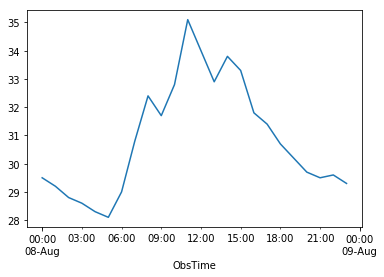

In [57]:
daily_data.set_index('ObsTime')['Temperature'].astype(float).plot()

## 爬取多時間段的氣象觀測資料至pandas

In [58]:
def get_between_day(date_start, date_end):
    date_list = []
    date_start = datetime.datetime.strptime(date_start, "%Y-%m-%d")
    date_end = datetime.datetime.strptime(date_end, "%Y-%m-%d")
    while date_start <= date_end:
        date_str = date_start.strftime("%Y-%m-%d")
        date_list.append(date_str)
        date_start += datetime.timedelta(days=1)
    return date_list

In [59]:
source_url = "https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker="
date_list = get_between_day('2020-08-01', '2020-08-08')

codis_df_all = pd.DataFrame()
for date in date_list:
    url = source_url + date
    codis_df_temp = pd.read_html(requests.get(url).text, encoding='utf-8')[1]
    codis_df_temp.columns = codis_df_temp.loc[2].values
    codis_df_temp = codis_df_temp.loc[3:, :]
    # 把原本1~24的時間欄位變成 datetime 格式 > year, month, day, hour
    codis_df_temp['ObsTime'] = codis_df_temp['ObsTime'].apply(convert_time)
    codis_df_all = pd.concat([codis_df_all, codis_df_temp], axis=0)
    
codis_df_all['ObsTime'] = codis_df_all['ObsTime'] + datetime.timedelta(hours=1)

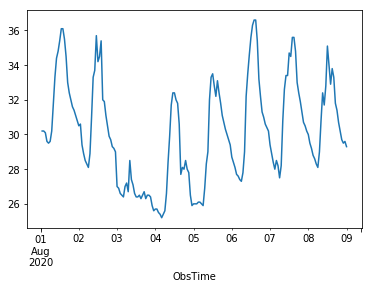

In [60]:
codis_df_all.set_index('ObsTime')['Temperature'].astype(float).plot()

In [63]:
source_url = "https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker="
date_list = get_between_day('2015-01-01', '2015-12-31')

codis_df_all = pd.DataFrame()
for date in date_list:
    url = source_url + date
    codis_df_temp = pd.read_html(requests.get(url).text, encoding='utf-8')[1]
    codis_df_temp.columns = codis_df_temp.loc[2].values
    codis_df_temp = codis_df_temp.loc[3:, :]
    # 把原本1~24的時間欄位變成 datetime 格式 > year, month, day, hour
    codis_df_temp['ObsTime'] = codis_df_temp['ObsTime'].apply(convert_time)
    codis_df_temp = codis_df_temp[['ObsTime', 'StnPres', 'Temperature', 'RH', 'WS', 'WD', 'Precp']]
    codis_df_all = pd.concat([codis_df_all, codis_df_temp], axis=0)
    
codis_df_all['ObsTime'] = codis_df_all['ObsTime'] + datetime.timedelta(hours=1)
codis_df_all.to_csv(f'data/codis_{date[:4]}.csv', index=False)